# 3장. 신경망

https://github.com/WegraLee/deep-learning-from-scratch

이 코드의 내용은 Deep Learning from Scratch를 참고했음을 밝힙니다.

### 계단 함수 구현하기(p69)

In [1]:
# 이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들입니다.
# 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없습니다.
# 가령 step_function(np.array([1.0, 2.0]))는 안 됩니다.

def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x>0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

### 계단 함수의 그래프(p70)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

<Figure size 640x480 with 1 Axes>

### 시그모이드 함수 구현하기(p72)

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [10]:
1.0/t

array([1.        , 0.5       , 0.33333333])

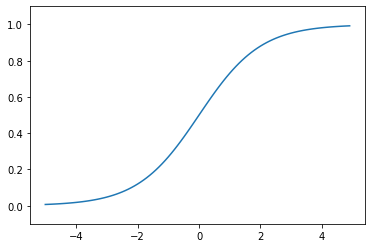

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### ReLU 함수(p76)

In [12]:
def relu(x):
    return np.maximum(0, x)

### 다차원 배열(p77)

In [13]:
# 1차원 배열

import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [14]:
np.ndim(A) # 배열의 차원 수

1

In [15]:
A.shape # 배열의 형상

(4,)

In [16]:
A.shape[0]

4

In [17]:
# 2차원 배열

B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [18]:
np.ndim(B)

2

In [19]:
B.shape

(3, 2)

### 행렬의 곱(p79)

In [20]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [21]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [22]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [24]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [25]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [26]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [27]:
A.shape

(2, 3)

In [28]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [29]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [30]:
B = np.array([7,8])
B.shape

(2,)

In [31]:
np.dot(A,B)

array([23, 53, 83])

### 신경망에서의 행렬 곱(p82)

In [32]:
X = np.array([1,2])
X.shape

(2,)

In [33]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [34]:
W.shape

(2, 3)

In [35]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


### 3층 신경망 구현하기(p83)

![image.png](https://i.imgur.com/jlp6Sy7.png)

In [36]:
# 입력층에서 1층으로 신호 전달

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2,3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [37]:
# 활성화 함수(시그모이드 함수)

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [38]:
# 1층에서 2층으로의 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3,2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [39]:
# 2층에서 출력층으로의 신호 전달

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

### 구현 정리(p89)

In [40]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 항등 함수와 소프트맥스 함수 구현하기(p91)

In [41]:
a = np.array([0.3, 2.9, 4.0])

In [42]:
exp_a = np.exp(a) # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [43]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [44]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [45]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 시 주의점(p93)

오버플로 문제 : 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 쉽게 아주 큰 값을 내뱉죠. 가령 e\*\*10은 20,000이 넘고, e\*\*100은 0이 40개 넘는 큰 값이 되고, e\*\*1000은 무한대를 뜻하는 inf가 되어 돌아옵니다. 그리고 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해집니다.<br><br>
따라서 이 문제를 해결하도록 소프트맥스 함수 구현을 개선해봅시다. 다음은 개선한 수식입니다.

![image.png](https://i.imgur.com/L1MRbQL.png)

위의 식이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다는 것입니다. 여기서 C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적입니다.

In [46]:
# 제대로 계산되지 않는다.
# 이 예에서 보는 것처럼 아무런 조치 없이 그냥 계산하면 nan이 출력됩니다(nan은 not a number의 약자입니다).

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([nan, nan, nan])

In [47]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [48]:
# 하지만 입력 신호 중 최댓값(이 예에서는 c)을 빼주면 올바르게 계산할 수 있습니다.

np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [49]:
# 이를 바탕으로 소프트맥스 함수를 다시 구현하면 다음과 같습니다.

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [50]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) # 소포트맥스 함수의 출력은 0에서 1.0 사이의 실수입니다.

[0.01821127 0.24519181 0.73659691]


In [51]:
np.sum(y) # 소프트맥스 함수 출력의 총합은 1입니다.

# 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질입니다.
# 이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있습니다.

1.0

### 손글씨 숫자 인식(p96)

In [54]:
import sys, os
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [55]:
import sys, os
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

    
# 첫 번째 인수인 normalize는 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정합니다.
# False로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0 ~ 255 사이의 값을 유지합니다.
# 두 번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정합니다.
# False로 설정하면 입력 이미지를 1*28*28의 3차원 배열로,
# True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장힙니다.
# 세 번째 인수인 one_hot_label은 레이블을 원-핫 인코딩(one-hot encoding)형태로 저장할지를 정합니다.
# 원-핫 인코딩이란, 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 정답을 뜻하는 원소만 1이고(hot하고) 나머지는 모두 0인 배열입니다.
# one_hot_label이 False면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고,
# True일 때는 레이블을 원-핫 인코딩하여 저장합니다.

    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28,28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [66]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False) # 입력 이미지 데이터에 대한 전처리(pre-processing) 작업으로 정규화(normalization)를 수행
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [67]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


### 배치 처리(p102)

In [68]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [69]:
x.shape

(10000, 784)

In [70]:
x[0].shape

(784,)

In [71]:
W1.shape

(784, 50)

In [72]:
W2.shape

(50, 100)

In [73]:
W3.shape

(100, 10)

신경망 각 층의 배열 형상의 추이<br>
![image.png](https://i.imgur.com/pldQGUi.png)

배치 처리를 위한 배열들의 형상 추이<br>
![image.png](https://i.imgur.com/FO2Pu7q.png)

In [74]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [75]:
# range() 함수

list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [76]:
list(range(0,10,3))

[0, 3, 6, 9]

In [77]:
# argmax()

x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [78]:
# == 연산자

y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t)

[ True  True False  True]


In [79]:
np.sum(y==t)

3

### 정리(p106)

* 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
* 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구성할 수 있다.
* 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
* 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
* 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
* 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.